## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from PIL import Image


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 67 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
3/3 [==============================] - 20s 3s/step - loss: 10.5451 - accuracy: 0.2836 - val_loss: 8.0680 - val_accuracy: 0.3276
Epoch 2/100
3/3 [==============================] - 1s 410ms/step - loss: 4.3048 - accuracy: 0.4328 - val_loss: 7.7657 - val_accuracy: 0.1552
Epoch 3/100
3/3 [==============================] - 1s 447ms/step - loss: 5.7650 - accuracy: 0.3284 - val_loss: 1.4875 - val_accuracy: 0.5345
Epoch 4/100
3/3 [==============================] - 1s 609ms/step - loss: 1.7631 - accuracy: 0.3881 - val_loss: 2.8846 - val_accuracy: 0.3276
Epoch 5/100
3/3 [==============================] - 1s 479ms/step - loss: 1.4806 - accuracy: 0.5373 - val_loss: 1.8517 - val_accuracy: 0.3966
Epoch 6/100
3/3 [==============================] - 1s 599ms/step - loss: 2.8861 - accuracy: 0.4776 - val_loss: 2.7142 - val_accuracy: 0.5345
Epoch 7/100
3/3 [==============================] - 1s 464ms/step - loss: 1.8717 - accuracy: 0.5672 - val_loss: 1.1248 - val_accuracy: 0.5000
Epoch 8/100
3/

Epoch 59/100
3/3 [==============================] - 1s 397ms/step - loss: 0.2332 - accuracy: 0.9254 - val_loss: 0.9310 - val_accuracy: 0.7241
Epoch 60/100
3/3 [==============================] - 1s 468ms/step - loss: 0.2897 - accuracy: 0.8806 - val_loss: 0.9192 - val_accuracy: 0.7759
Epoch 61/100
3/3 [==============================] - 1s 460ms/step - loss: 0.2082 - accuracy: 0.9254 - val_loss: 0.9867 - val_accuracy: 0.6724
Epoch 62/100
3/3 [==============================] - 1s 631ms/step - loss: 0.2293 - accuracy: 0.9104 - val_loss: 0.8644 - val_accuracy: 0.7414
Epoch 63/100
3/3 [==============================] - 1s 633ms/step - loss: 0.2052 - accuracy: 0.9104 - val_loss: 0.8958 - val_accuracy: 0.7759
Epoch 64/100
3/3 [==============================] - 1s 615ms/step - loss: 0.2118 - accuracy: 0.9552 - val_loss: 1.0653 - val_accuracy: 0.6379
Epoch 65/100
3/3 [==============================] - 1s 442ms/step - loss: 0.2707 - accuracy: 0.9104 - val_loss: 0.8831 - val_accuracy: 0.7414
Epoch 

In [16]:
r.history

{'loss': [10.54512882232666,
  4.30483865737915,
  5.765008926391602,
  1.7631423473358154,
  1.4805995225906372,
  2.8860578536987305,
  1.8717230558395386,
  2.062171220779419,
  0.9100966453552246,
  1.5333528518676758,
  1.9948482513427734,
  1.7928708791732788,
  3.309662342071533,
  0.9862035512924194,
  3.37483286857605,
  2.890622615814209,
  2.5104544162750244,
  3.1656267642974854,
  1.2124241590499878,
  1.2135523557662964,
  0.7374376654624939,
  0.5600934624671936,
  0.644804060459137,
  0.5351065993309021,
  1.1702244281768799,
  1.01888906955719,
  1.519171118736267,
  1.6378413438796997,
  0.9463949799537659,
  0.6934377551078796,
  0.6278600096702576,
  0.792772650718689,
  1.1202075481414795,
  0.7016964554786682,
  1.3013689517974854,
  0.9080032110214233,
  1.2441143989562988,
  0.661333441734314,
  0.7003664374351501,
  0.3054579198360443,
  0.33620283007621765,
  0.3370455801486969,
  0.4121600389480591,
  0.34967073798179626,
  0.22089742124080658,
  0.2791568040

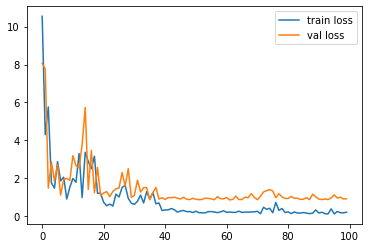

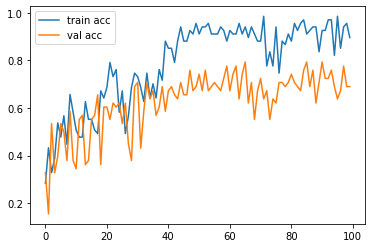

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[2.05061838e-06, 1.69117004e-03, 9.98306751e-01],
       [4.74438146e-02, 9.71552506e-02, 8.55400920e-01],
       [8.25935230e-02, 7.65515506e-01, 1.51890934e-01],
       [1.42637771e-02, 7.88220346e-01, 1.97515860e-01],
       [1.26519380e-03, 9.97655511e-01, 1.07927690e-03],
       [1.42151803e-01, 7.72032022e-01, 8.58161896e-02],
       [6.38590753e-02, 8.65941942e-01, 7.01989457e-02],
       [3.24997604e-01, 6.78454787e-02, 6.07156932e-01],
       [2.68776082e-02, 8.64506483e-01, 1.08615912e-01],
       [1.03734501e-01, 4.10884231e-01, 4.85381246e-01],
       [3.12854117e-03, 3.49133130e-04, 9.96522307e-01],
       [3.57991666e-01, 3.91992301e-01, 2.50016063e-01],
       [4.65247929e-02, 2.76333839e-01, 6.77141309e-01],
       [8.96344423e-01, 6.89943205e-04, 1.02965586e-01],
       [6.23246059e-02, 4.30759549e-01, 5.06915867e-01],
       [7.01301098e-01, 1.38302743e-01, 1.60396203e-01],
       [4.89368066e-02, 6.93788946e-01, 2.57274210e-01],
       [2.81758443e-03, 5.64708

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [25]:
img=image.load_img('Datasets/Test/lamborghini/8.jpg',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[ 25.,  24.,  22.],
        [ 25.,  24.,  22.],
        [ 24.,  23.,  21.],
        ...,
        [ 86., 133.,  78.],
        [ 86., 135.,  79.],
        [ 83., 132.,  76.]],

       [[ 25.,  24.,  22.],
        [ 25.,  24.,  22.],
        [ 24.,  23.,  21.],
        ...,
        [ 91., 138.,  83.],
        [ 89., 138.,  82.],
        [ 83., 132.,  76.]],

       [[ 25.,  24.,  22.],
        [ 25.,  24.,  22.],
        [ 24.,  23.,  21.],
        ...,
        [ 94., 141.,  86.],
        [ 91., 140.,  84.],
        [ 83., 132.,  76.]],

       ...,

       [[244., 245., 250.],
        [244., 245., 250.],
        [244., 245., 250.],
        ...,
        [202., 202., 204.],
        [202., 202., 204.],
        [202., 202., 204.]],

       [[244., 245., 250.],
        [244., 245., 250.],
        [244., 245., 250.],
        ...,
        [203., 203., 205.],
        [203., 203., 205.],
        [202., 202., 204.]],

       [[245., 246., 251.],
        [245., 246., 251.],
        [245., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[0.01106369, 0.0310829 , 0.9578534 ]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a==1

array([False])